In [2]:
import numpy
import cv2
import pywt 
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [3]:
def crop_img_to_eye(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        roi_gray = gray[y:y+h, x:x+w] # region of interest
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

In [4]:
path_to_data = "./face_data/"
path_to_crop_data = "./face_data/cropped/"


import os
image_directories = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        image_directories.append(entry.path)

In [5]:
image_directories

['./face_data/Akshay',
 './face_data/cropped',
 './face_data/Depika',
 './face_data/kohli',
 './face_data/messi',
 './face_data/m_Sharapova',
 './face_data/Nora',
 './face_data/Ranbir',
 './face_data/Urvashi']

In [6]:
import shutil
if os.path.exists(path_to_crop_data):
     shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)

In [7]:
cropped_image_directories = []
for image_directory in image_directories:
    count = 1
    celebrity_name = image_directory.split('/')[-1]
    for entry in os.scandir(image_directory):
        try:
            roi_color = crop_img_to_eye(entry.path)
        except:
            continue
        if roi_color is not None:
            cropped_folder = path_to_crop_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_directories.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            count += 1 

Generating cropped images in folder:  ./face_data/cropped/Akshay
Generating cropped images in folder:  ./face_data/cropped/Depika
Generating cropped images in folder:  ./face_data/cropped/kohli
Generating cropped images in folder:  ./face_data/cropped/messi
Generating cropped images in folder:  ./face_data/cropped/m_Sharapova
Generating cropped images in folder:  ./face_data/cropped/Nora
Generating cropped images in folder:  ./face_data/cropped/Ranbir
Generating cropped images in folder:  ./face_data/cropped/Urvashi


In [8]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_directories:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Akshay': ['./face_data/cropped/Akshay\\Akshay1.png',
  './face_data/cropped/Akshay\\Akshay10.png',
  './face_data/cropped/Akshay\\Akshay11.png',
  './face_data/cropped/Akshay\\Akshay12.png',
  './face_data/cropped/Akshay\\Akshay13.png',
  './face_data/cropped/Akshay\\Akshay14.png',
  './face_data/cropped/Akshay\\Akshay15.png',
  './face_data/cropped/Akshay\\Akshay16.png',
  './face_data/cropped/Akshay\\Akshay17.png',
  './face_data/cropped/Akshay\\Akshay18.png',
  './face_data/cropped/Akshay\\Akshay19.png',
  './face_data/cropped/Akshay\\Akshay2.png',
  './face_data/cropped/Akshay\\Akshay20.png',
  './face_data/cropped/Akshay\\Akshay21.png',
  './face_data/cropped/Akshay\\Akshay22.png',
  './face_data/cropped/Akshay\\Akshay23.png',
  './face_data/cropped/Akshay\\Akshay24.png',
  './face_data/cropped/Akshay\\Akshay25.png',
  './face_data/cropped/Akshay\\Akshay26.png',
  './face_data/cropped/Akshay\\Akshay27.png',
  './face_data/cropped/Akshay\\Akshay28.png',
  './face_data/cropped/Aks

In [9]:
name_id_dic = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    name_id_dic[celebrity_name] = count
    count = count + 1
name_id_dic

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

In [11]:
def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  numpy.float32(imArray)   
    imArray /= 255

    coeffs=pywt.wavedec2(imArray, mode, level=level)


    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  numpy.uint8(imArray_H)

    return imArray_H

In [12]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = numpy.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(name_id_dic[celebrity_name])


In [13]:
X = numpy.array(X).reshape(len(X),4096).astype(float)
X.shape

(483, 4096)

In [14]:
name_id_dic

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

In [15]:
from collections import Counter
Counter(y)

Counter({0: 60, 1: 72, 2: 48, 3: 39, 4: 35, 5: 46, 6: 63, 7: 120})

Making of model

In [16]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [18]:
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

MODEL PARAMETERS

In [46]:
scores=[]
best_estimators = {}


model_params = {  

    
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2,3,4,5,6,7,18,19,20,21,22,23,24],
            'algorithm' : ['auto','ball_tree','kd_tree'],
            'weights' : ['uniform','distance'],
            'leaf_size' : [27,28,29,30,31,32,33,34,35]
        }
    },
    
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [None,1,2,6,5,4,3]
        }
    },
    
    
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [30,35,40,45,50,55,58,60,65,70],
            'learning_rate' : [0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,2],
            'algorithm' : ['SAMME', 'SAMME.R']
        }
    },
    
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            
        }
    },
    
     'LOGISTIC_REGRESSION': {
        'model': LogisticRegression(),
        'params': {
            'C': [1,2,3,4,5,6,7,8,9,10],
            'solver' : [ 'liblinear', 'lbfgs'],
            'multi_class' : ['auto', 'ovr' ]
        }
    },
    
        
    'SVM': {
        'model': SVC(),
        'params': {
             'C': [1,2,3,5,6,7],
             'kernel': ['rbf','linear'],
             'gamma': ['auto', 'scale']
        }
    },
       
    'RANDOM_FOREST':{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,2,3,4,5,10,15,20,25,30],
            'criterion': ['entropy'],
            'random_state' : [11,12,13],
            'max_depth' : [4,5,6]

        }
    }
}

In [47]:
import time


for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    start_time = time.time()
    
    clf.fit(X_train, y_train)    
    

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': str(clf.best_params_)
    })
    best_estimators[model_name] = clf.best_estimator_
    print('{} minutes'.format((time.time() - start_time)/60))

KNeighborsClassifier() {'n_neighbors': [2, 3, 4, 5, 6, 7, 18, 19, 20, 21, 22, 23, 24], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'weights': ['uniform', 'distance'], 'leaf_size': [27, 28, 29, 30, 31, 32, 33, 34, 35]}
15.814029184977214 minutes
DecisionTreeClassifier() {'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 6, 5, 4, 3]}
1.1369599898656209 minutes
AdaBoostClassifier() {'n_estimators': [30, 35, 40, 45, 50, 55, 58, 60, 65, 70], 'learning_rate': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2], 'algorithm': ['SAMME', 'SAMME.R']}
100.7872612675031 minutes
GaussianNB() {}
0.005270560582478841 minutes
LogisticRegression() {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'solver': ['liblinear', 'lbfgs'], 'multi_class': ['auto', 'ovr']}


C:\Users\askha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\askha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

8.982012605667114 minutes
SVC() {'C': [1, 2, 3, 5, 6, 7], 'kernel': ['rbf', 'linear'], 'gamma': ['auto', 'scale']}
0.4022909879684448 minutes
RandomForestClassifier() {'n_estimators': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30], 'criterion': ['entropy'], 'random_state': [11, 12, 13], 'max_depth': [4, 5, 6]}
1.1621149977048237 minutes


In [28]:
scores=[]
best_estimators = {}


model_params = {      
     'LOGISTIC_REGRESSION': {
        'model': LogisticRegression(),
        'params': {
            'C': [1,2,3,4,5,6,7,8,9,10],
            'solver' : [ 'liblinear', 'lbfgs'],
            'multi_class' : ['auto', 'ovr' ],
            'max_iter' : [1000]
        }
    },
    
        
    'SVM': {
        'model': SVC(),
        'params': {
             'C': [1,2,3,5,6,7],
             'kernel': ['rbf','linear'],
             'gamma': ['auto', 'scale']
        }
    },
       
    'RANDOM_FOREST':{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,2,3,4,5,10,15,20,25,30],
            'criterion': ['entropy'],
            'random_state' : [11,12,13],
            'max_depth' : [4,5,6]

        }
    }
}

In [29]:
import time


for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    start_time = time.time()
    
    clf.fit(X_train, y_train)    
    

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': str(clf.best_params_)
    })
    best_estimators[model_name] = clf.best_estimator_
    print('{} minutes'.format((time.time() - start_time)/60))

LogisticRegression() {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'solver': ['liblinear', 'lbfgs'], 'multi_class': ['auto', 'ovr'], 'max_iter': [1000]}
10.849177658557892 minutes
SVC() {'C': [1, 2, 3, 5, 6, 7], 'kernel': ['rbf', 'linear'], 'gamma': ['auto', 'scale']}
0.44671196142832437 minutes
RandomForestClassifier() {'n_estimators': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30], 'criterion': ['entropy'], 'random_state': [11, 12, 13], 'max_depth': [4, 5, 6]}
1.1959310213724772 minutes


In [48]:
import pandas as pd    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df = df.sort_values(by='best_score',ascending=False)
df

,model,best_score,best_params
4,LOGISTIC_REGRESSION,0.746121,"{'C': 10, 'multi_class': 'ovr', 'solver': 'lbf..."
5,SVM,0.725475,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
6,RANDOM_FOREST,0.608891,"{'criterion': 'entropy', 'max_depth': 6, 'n_es..."
0,KNeighborsClassifier,0.608858,"{'algorithm': 'auto', 'leaf_size': 27, 'n_neig..."
3,GaussianNB,0.585514,{}
2,AdaBoostClassifier,0.481785,"{'algorithm': 'SAMME', 'learning_rate': 0.9, '..."
1,DecisionTreeClassifier,0.417150,"{'criterion': 'entropy', 'max_depth': 4}"


Evaluations

In [30]:
import pandas as pd    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df = df.sort_values(by='best_score',ascending=False)
df

,model,best_score,best_params
0,LOGISTIC_REGRESSION,0.746121,"{'C': 3, 'max_iter': 1000, 'multi_class': 'ovr..."
1,SVM,0.728039,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
2,RANDOM_FOREST,0.603596,"{'criterion': 'entropy', 'max_depth': 6, 'n_es..."


In [31]:
best_estimators['LOGISTIC_REGRESSION'].score(X_test,y_test)

0.7319587628865979

In [33]:
best_estimators['SVM'].score(X_test,y_test)

0.7525773195876289

In [34]:
best_estimators['RANDOM_FOREST'].score(X_test,y_test)

0.5670103092783505

In [36]:
cross_val_score(best_estimators['RANDOM_FOREST'],X_test,y_test,cv=5).mean()
cross_val_score(best_estimators['SVM'],X_test,y_test,cv=5).mean()
cross_val_score(best_estimators['LOGISTIC_REGRESSION'],X_test,y_test,cv=5).mean()

0.5457894736842105

In [38]:
best_clf = best_estimators['SVM']
best_clf

SVC(C=1, gamma='auto', kernel='linear')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.76      0.81      0.79        16
           2       0.90      0.75      0.82        12
           3       1.00      0.80      0.89         5
           4       0.80      0.80      0.80         5
           5       0.75      0.75      0.75        12
           6       0.86      0.67      0.75        18
           7       0.65      0.85      0.74        20

    accuracy                           0.75        97
   macro avg       0.79      0.75      0.76        97
weighted avg       0.77      0.75      0.75        97



In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  0,  0,  0,  0,  1,  2],
       [ 0, 13,  0,  0,  0,  1,  1,  1],
       [ 2,  1,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  9,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 12,  4],
       [ 0,  0,  0,  0,  1,  2,  0, 17]], dtype=int64)

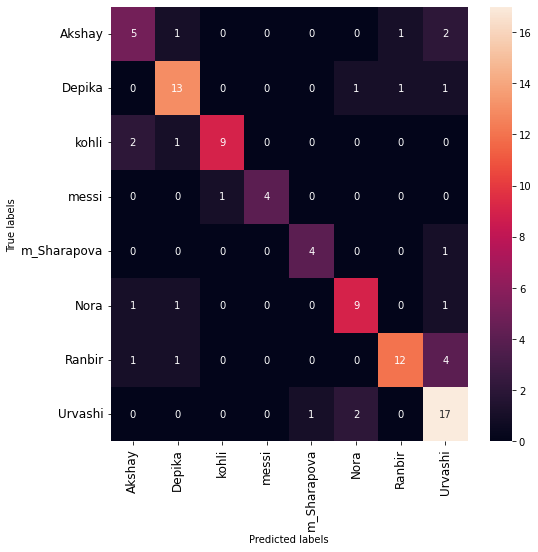

In [41]:
import seaborn as sns 
fig, ax = pyplot.subplots(figsize=(8,8))

g = sns.heatmap(cm,annot=True,ax=ax)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
ax.xaxis.set_ticklabels(name_id_dic.keys()); ax.yaxis.set_ticklabels(name_id_dic.keys());
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [42]:
name_id_dic

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

Saving our model

In [43]:
svm = SVC(C=1, gamma='auto',kernel='linear')

In [44]:
svm.fit(X,y)

SVC(C=1, gamma='auto', kernel='linear')

In [45]:
import joblib
joblib.dump(svm, 'face_recognition_model.pkl')

['face_recognition_model.pkl']

saving the name-id dictionary in a json file

In [46]:
import json
with open("name_id.json","w") as f:
    f.write(json.dumps(name_id_dic))

In [47]:
X_train

array([[-1.2248444 , -1.22577672, -1.33964978, ..., -2.19405601,
        -2.28484862, -2.11764285],
       [-0.86149978, -0.96457332, -1.04939233, ..., -0.31921286,
        -0.48836395, -0.43940322],
       [ 0.48501263,  0.43939495,  0.3014212 , ...,  0.61820872,
        -0.17769367, -0.40006948],
       ...,
       [ 0.72011797,  0.3305602 ,  0.14512873, ...,  0.98276156,
         0.82185419,  0.97661146],
       [ 1.42543399,  1.41890771,  1.37314102, ..., -2.18103627,
        -2.27134122, -2.1307541 ],
       [-1.15003815, -1.17135935, -1.2280123 , ...,  0.80048514,
         0.63275054,  0.60949654]])